In [1]:
import pandas as pd

PERSIAPAN DATA 

1.  Dataset: Pastikan Anda memiliki data curah hujan dan variabel input pendukung, seperti suhu, kelembapan, dan tekanan udara.
2.  Preprocessing Data:
Menangani missing values.
Normalisasi data menggunakan MinMaxScaler agar model bekerja lebih baik.
Ubah data menjadi format time-series (misalnya: input data selama 10 hari sebelumnya untuk memprediksi curah hujan hari berikutnya).
3.  Pisahkan Data:
Data dibagi menjadi training dan testing.
Untuk K-Fold Cross Validation, data training akan dibagi lagi menjadi beberapa lipatan.

In [2]:
data = pd.read_csv("/Users/januaralfiansyah/Documents/SKRIPSI_2/codingan/data_set/data_set_2021.csv")
data

ParserError: Error tokenizing data. C error: Expected 1 fields in line 40, saw 2


In [3]:
# Menghitung jumlah nilai NaN per kolom
print(data.isna().sum())

Tahun         0
Bulan         0
tgl           0
temp7         0
temp13        0
temp18        0
temp_avg      0
temp_24       0
temp_max      0
temp_min      0
CH            0
light_hour    0
light_per     0
pck           0
tgl.1         0
press         0
humid7        0
humid13       0
humid18       0
humid_avg     0
humid_24      0
ws_abg        0
mod_dir       0
max_ws        0
dir           0
dtype: int64


In [4]:
data.count()

Tahun         366
Bulan         366
tgl           366
temp7         366
temp13        366
temp18        366
temp_avg      366
temp_24       366
temp_max      366
temp_min      366
CH            366
light_hour    366
light_per     366
pck           366
tgl.1         366
press         366
humid7        366
humid13       366
humid18       366
humid_avg     366
humid_24      366
ws_abg        366
mod_dir       366
max_ws        366
dir           366
dtype: int64

In [5]:
# Menghapus kolom yang tidak diperlukan

# Drop kolom yang tidak digunakan
data = data.drop(columns=['Tahun', 'CH', 'light_hour', 'light_per', 'pck', 'press', 'ws_abg', 'mod_dir', 'max_ws', 'dir'], axis=1)


In [6]:
data

,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,tgl.1,humid7,humid13,humid18,humid_avg,humid_24
0,1,1.0,26.3,32.3,28.8,28.4,28.4,32.9,24.6,1.0,92.72339050173582,65.0188026263269,79.9792315683067,83.0,82.0
1,1,2.0,26.1,31.5,27.2,27.7,27.5,31.7,25.2,2.0,90.30761062566066,69.40288984888305,86.71938446937911,84.0,86.0
2,1,3.0,26.6,31.4,26.6,27.8,27.8,32.5,25.6,3.0,86.5437471238459,69.97066069376442,90.41467422295305,83.0,83.0
3,1,4.0,26.2,31.8,29.5,28.4,28.6,33.0,25.5,4.0,86.4234912104948,62.88699987233136,74.78721885027767,78.0,78.0
4,1,5.0,27.2,26.8,26.6,27.0,27.0,32.4,25.4,5.0,92.08725069158208,90.45670689176886,88.85779948974681,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27.0,27.9,34.7,25.9,29.1,27.2,35.7,24.6,27.0,80.31654583977061,56.576342055224984,91.05908580220675,77.0,84.0
362,12,28.0,26.4,33.6,27.4,28.5,27.7,35.8,25.1,28.0,88.80836197722951,62.96448376775169,77.92790980700342,80.0,82.0
363,12,29.0,26.3,32.7,30.4,28.9,29.0,34.0,26.0,29.0,91.9296224982397,59.465948515600964,74.57811767655987,79.0,80.0
364,12,30.0,27.0,32.2,25.4,27.9,27.8,33.4,24.0,30.0,85.90249604768772,64.95270684844482,90.15280438641373,82.0,84.0


In [7]:
# Memilih Atribut dan label
features = ['temp7', 'temp13', 'temp18', 'temp_24', 'temp_max', 'temp_min', 'humid7', 'humid13', 'humid18', 'humid_24']
target = ['temp_avg', 'humid_avg']

In [8]:
# Exploratory data analysis (EDA)

# Informasi tipe data setiap kolom
print(data[features].info())
# Cuplikan data  
print(data[features].head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   temp7     366 non-null    object
 1   temp13    366 non-null    object
 2   temp18    366 non-null    object
 3   temp_24   366 non-null    object
 4   temp_max  366 non-null    object
 5   temp_min  366 non-null    object
 6   humid7    366 non-null    object
 7   humid13   366 non-null    object
 8   humid18   366 non-null    object
 9   humid_24  366 non-null    object
dtypes: object(10)
memory usage: 28.7+ KB
None
  temp7 temp13 temp18 temp_24 temp_max temp_min             humid7  \
0  26.3   32.3   28.8    28.4     32.9     24.6  92.72339050173582   
1  26.1   31.5   27.2    27.5     31.7     25.2  90.30761062566066   
2  26.6   31.4   26.6    27.8     32.5     25.6   86.5437471238459   
3  26.2   31.8   29.5    28.6     33.0     25.5   86.4234912104948   
4  27.2   26.8   26.6    27.0     32.4    

In [9]:
# Daftar kolom yang akan diubah ke tipe float

numeric_columns = ['temp7', 'temp13', 'temp18', 'temp_24', 'temp_max', 'temp_min', 'humid7', 'humid13', 'humid18', 'humid_24', 'temp_avg', 'humid_avg']

# Konversi ke tipe float
for columns in numeric_columns:
    data[columns] = pd.to_numeric(data[columns], errors='coerce')

In [10]:
# Menghapus data NaN 
data = data.dropna()
data

,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,tgl.1,humid7,humid13,humid18,humid_avg,humid_24
0,1,1.0,26.3,32.3,28.8,28.4,28.4,32.9,24.6,1.0,92.723391,65.018803,79.979232,83.0,82.0
1,1,2.0,26.1,31.5,27.2,27.7,27.5,31.7,25.2,2.0,90.307611,69.402890,86.719384,84.0,86.0
2,1,3.0,26.6,31.4,26.6,27.8,27.8,32.5,25.6,3.0,86.543747,69.970661,90.414674,83.0,83.0
3,1,4.0,26.2,31.8,29.5,28.4,28.6,33.0,25.5,4.0,86.423491,62.887000,74.787219,78.0,78.0
4,1,5.0,27.2,26.8,26.6,27.0,27.0,32.4,25.4,5.0,92.087251,90.456707,88.857799,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27.0,27.9,34.7,25.9,29.1,27.2,35.7,24.6,27.0,80.316546,56.576342,91.059086,77.0,84.0
362,12,28.0,26.4,33.6,27.4,28.5,27.7,35.8,25.1,28.0,88.808362,62.964484,77.927910,80.0,82.0
363,12,29.0,26.3,32.7,30.4,28.9,29.0,34.0,26.0,29.0,91.929622,59.465949,74.578118,79.0,80.0
364,12,30.0,27.0,32.2,25.4,27.9,27.8,33.4,24.0,30.0,85.902496,64.952707,90.152804,82.0,84.0


In [11]:
dff = data.groupby(["Bulan"]).temp_avg.describe().reset_index()

In [12]:
dff

,Bulan,count,mean,std,min,25%,50%,75%,max
0,1,31.0,27.890323,0.713375,26.6,27.40,27.80,28.500,29.2
1,2,28.0,28.025000,0.695288,26.6,27.55,28.05,28.525,29.3
2,3,31.0,28.351613,0.769793,27.1,27.85,28.20,29.000,29.7
3,4,30.0,29.066667,0.601340,27.6,28.70,29.10,29.400,30.4
4,5,31.0,29.477419,0.610852,27.7,29.20,29.50,29.900,30.6
5,6,30.0,28.960000,0.889246,26.7,28.45,29.20,29.700,30.1
6,7,31.0,28.370968,0.687601,26.8,27.90,28.50,28.800,29.9
7,8,31.0,28.948387,0.529699,27.7,28.70,29.00,29.350,30.0
8,9,30.0,28.910000,0.430997,28.3,28.50,28.85,29.200,29.8
9,10,31.0,29.822581,0.844476,28.1,29.20,29.60,30.550,31.2


/var/folders/l8/wksw6z8d6p1g8jf93wktmwgc0000gn/T/ipykernel_989/808433973.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns .barplot(x=dff['Bulan'], y=dff['temp_avg'], palette='pastel', ci=None)
/var/folders/l8/wksw6z8d6p1g8jf93wktmwgc0000gn/T/ipykernel_989/808433973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns .barplot(x=dff['Bulan'], y=dff['temp_avg'], palette='pastel', ci=None)


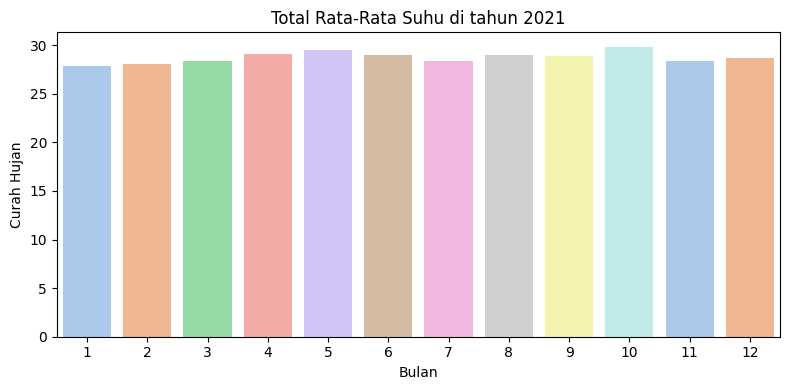

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

dff = data.groupby(["Bulan"]).temp_avg.mean().reset_index()
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns .barplot(x=dff['Bulan'], y=dff['temp_avg'], palette='pastel', ci=None)
ax.set(title='Total Rata-Rata Suhu di tahun 2021', xlabel='Bulan', ylabel='Curah Hujan')
plt.show()

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X = data[features].values
y = data[target].values

# Normalisasi data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).reshape(-1)

2024-12-23 10:08:21.314644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
X

array([[26.3       , 32.3       , 28.8       , ..., 65.01880263,
        79.97923157, 82.        ],
       [26.1       , 31.5       , 27.2       , ..., 69.40288985,
        86.71938447, 86.        ],
       [26.6       , 31.4       , 26.6       , ..., 69.97066069,
        90.41467422, 83.        ],
       ...,
       [26.3       , 32.7       , 30.4       , ..., 59.46594852,
        74.57811768, 80.        ],
       [27.        , 32.2       , 25.4       , ..., 64.95270685,
        90.15280439, 84.        ],
       [26.3       , 33.        , 25.2       , ..., 63.13435329,
        94.99967015, 86.        ]])

In [16]:
X_scaled

array([[0.5       , 0.63207547, 0.59459459, ..., 0.48068398, 0.63137815,
        0.61290323],
       [0.46551724, 0.55660377, 0.37837838, ..., 0.56048543, 0.795807  ,
        0.74193548],
       [0.55172414, 0.54716981, 0.2972973 , ..., 0.5708203 , 0.88595514,
        0.64516129],
       ...,
       [0.5       , 0.66981132, 0.81081081, ..., 0.37960801, 0.49961571,
        0.5483871 ],
       [0.62068966, 0.62264151, 0.13513514, ..., 0.47948087, 0.87956672,
        0.67741935],
       [0.5       , 0.69811321, 0.10810811, ..., 0.44638224, 0.99780804,
        0.74193548]])

In [17]:
# Membuat data seret waktu dengan timestep
timesteps = 5 # Menggunakan data 5 hari sebelumnya

def create_sequences_multi(X, y, timesteps, horizon):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps - horizon + 1):
        X_seq.append(X[i:i+timesteps]) # 5 hari sebelumnya
        y_seq.append(y[i+timesteps:i+timesteps+horizon]) # 5 hari kedepan
    return np.array(X_seq), np.array(y_seq)

horizon = 5 # Prediksi untuk 5 hari kedepan
X_seq, y_seq = create_sequences_multi(X_scaled, y_scaled, timesteps, horizon)

In [18]:
from sklearn.model_selection import train_test_split
# Membagi dataset menjadi dua bagian : data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

2. Hyperparameter Tuning Menggunakan Optuna atau Keras Tuner
Hyperparameter tuning bertujuan untuk mencari kombinasi parameter terbaik yang digunakan oleh model LSTM. Hyperparameter yang biasanya dicari meliputi:
Jumlah unit (neurons) LSTM.
Jumlah timesteps (panjang urutan input time series).
Learning rate pada optimizer.
Jumlah epoch.
Ukuran batch (batch size).

In [19]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

# Fungsi untuk membuat model LSTM
def create_model(hp):
    model = Sequential()
    
    # Hyperparameter yang dioptimalkan
    n_layers = hp.Int('n_layers', min_value=1, max_value=3)  # Jumlah LSTM layers
    units = hp.Int('units', min_value=32, max_value=128, step=32)  # Unit di setiap layer
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')  # Learning rate
    batch_size = hp.Choice('batch_size', values=[16, 32, 64])  # Batch size
    
    # Tambahkan LSTM layers
    for i in range(n_layers):
        return_sequences = i < (n_layers - 1)  # Hanya layer selain terakhir yang return_sequences=True
        model.add(LSTM(units, return_sequences=return_sequences, input_shape=(timesteps, len(features)) if i == 0 else None))

    # Output layer
    model.add(Dense(1))  # Prediksi suhu rata-rata (temp_avg)

    # Kompilasi model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    return model

# Fungsi untuk melakukan pencarian hyperparameter menggunakan Keras Tuner
def objective(trial):
    # Buat model menggunakan Keras Tuner
    model = create_model(trial)
    
    # Latih model
    history = model.fit(
        X_train, y_train,
        epochs=10,  # Bisa diganti lebih banyak setelah tuning berhasil
        batch_size=trial.params['batch_size'],
        validation_data=(X_test, y_test),
        verbose=0  # Supaya output tidak terlalu banyak
    )

    # Evaluasi model dan kembalikan nilai MAE
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    return mae  # Keras Tuner akan meminimalkan MAE

# Buat tuner Keras Tuner (misalnya Hyperband)
tuner = kt.Hyperband(
    hypermodel=create_model,
    objective='val_mae',  # Gunakan string untuk mengacu pada metrik yang dioptimalkan
    max_epochs=10,
    hyperband_iterations=2,
    directory='keras_tuner_results',
    project_name='lstm_tuning'
)

# Mulai pencarian hyperparameter
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Hasil tuning terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)


Reloading Tuner from keras_tuner_results/lstm_tuning/tuner0.json
Best Hyperparameters: {'n_layers': 1, 'units': 64, 'learning_rate': 5.220919255241181e-05, 'batch_size': 16, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


Fold 1:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation MAE: 42.3764
Fold 2:
Validation MAE: 43.2436
Fold 3:
Validation MAE: 41.9015
Fold 4:
Validation MAE: 42.8873
Fold 5:
Validation MAE: 42.1519
Mean MAE from K-Fold: 42.5122
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


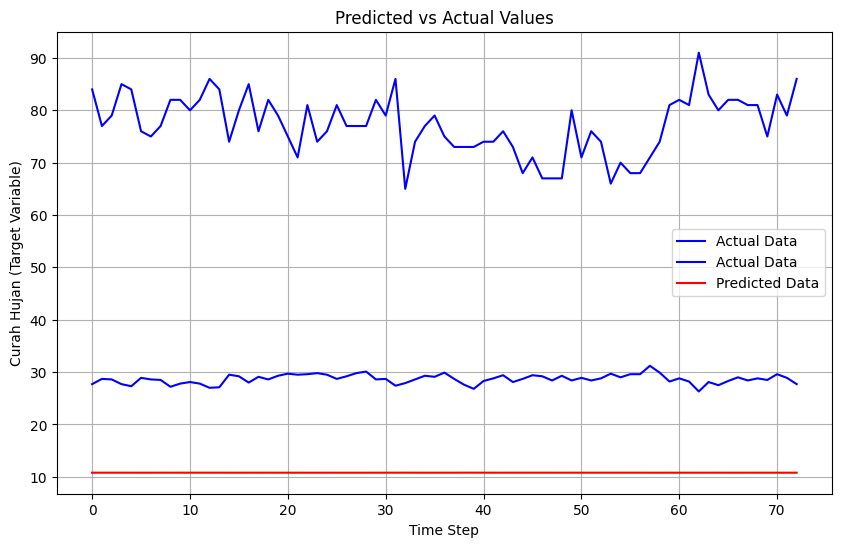

In [20]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter yang sudah ditentukan dari tuning
best_units = 64
best_learning_rate = 0.001

# Pastikan X memiliki dimensi 3D
X = X.reshape(X.shape[0], X.shape[1], 1)  # Contoh reshape untuk 1 fitur
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
mae_scores = []

# Fungsi untuk membuat model
def create_model(units, learning_rate, input_shape):
    model = Sequential([
        LSTM(units, return_sequences=False, input_shape=input_shape),
        Dense(1)  # Output untuk regresi
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

for train_index, test_index in kf.split(X):
    print(f"Fold {fold}:")
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Buat dan latih model
    model = create_model(best_units, best_learning_rate, (X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluasi model
    loss, mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation MAE: {mae:.4f}")
    mae_scores.append(mae)
    fold += 1

# Rata-rata MAE dari semua fold
print(f"Mean MAE from K-Fold: {np.mean(mae_scores):.4f}")

# Prediksi suhu pada data uji dari fold terakhir
y_pred = model.predict(X_val)
y_pred = y_pred.flatten()  # Mengubah menjadi 1 dimensi jika diperlukan

# Plot hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Data', color='blue')  # Data asli
plt.plot(y_pred, label='Predicted Data', color='red')  # Hasil prediksi model
plt.title('Predicted vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Curah Hujan (Target Variable)')
plt.legend()
plt.grid(True)
plt.show()
